# TensorFlow实现简单线性回归

本节将针对波士顿房价数据集的房间数量（RM）采用简单线性回归，目标是预测在最后一列（MEDV）给出的房价。

波士顿房价数据集可从http://lib.stat.cmu.edu/datasets/boston处获取。

本小节直接从 TensorFlow contrib 数据集加载数据。使用随机梯度下降优化器优化单个训练样本的系数。

## 实现简单线性回归的具体做法

1. 导入需要的所有软件包：

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2. 在神经网络中，所有的输入都线性增加。为了使训练有效，输入应该被归一化，所以这里定义一个函数来归一化输入数据：

In [2]:
def normalize(X):
    """规范化数组X"""
    mean = np.mean(X)
    #     std = np.std(arr,axis=0)  # axis=0计算每一列的标准差
    #     std = np.std(arr,axis=1)  # 计算每一行的标准差
    std = np.std(X)  # 计算全局标准差
    X = (X - mean) / std
    return X

3. 现在使用 TensorFlow contrib 数据集加载波士顿房价数据集，并将其分解为 X_train 和 Y_train。可以对数据进行归一化处理：

In [3]:
# Data
boston = tf.contrib.learn.datasets.load_dataset('boston')
# 数据集的第5列房间数量（RM），最后一列为标签（MEDV）给出的房价
X_train, Y_train = boston.data[:, 5], boston.target
# X_train = normalize(X_train) # 这一步是可选的
n_samples = len(X_train)
print("n_samples:", n_samples)

W0812 10:14:32.217827 14048 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0812 10:14:32.218809 14048 deprecation.py:323] From <ipython-input-3-feb7eea41c5b>:2: load_dataset (from tensorflow.contrib.learn.python.learn.datasets) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data.
W0812 10:14:32.220811 14048 deprecation.py:323] From D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\__init__.py:80: load_boston (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Use scikits.lear

n_samples: 506


4. 为训练数据声明 TensorFlow 占位符：

In [4]:
# Placeholder for the Training Data
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

5. 创建 TensorFlow 的权重和偏置变量且初始值为零：

In [5]:
# Variables for coefficients initialized to 0
b = tf.Variable(0.0)
w = tf.Variable(0.0)

6. 定义用于预测的线性回归模型：

In [6]:
# The Linear Regression Model
Y_hat = X * w + b

7.定义损失函数：

In [7]:
# Loss function
loss = tf.square(Y - Y_hat, name='loss')

8. 选择梯度下降优化器：

In [8]:
# Gradient Descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.01).minimize(loss)

9. 声明初始化操作符：

In [9]:
# Initializing Variables
init_op = tf.global_variables_initializer()
total = []

zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。

In [10]:
arr1 = [1, 2, 3]
arr2 = [4, 5, 6]
arr3 = [4, 5, 6, 7, 8]
print("(arr1,arr2)")
zipped = zip(arr1, arr2)
for temp in zipped:  # 打包为元组的列表
    print(temp)
print("(arr1,arr3)")
for temp in zip(arr1, arr3):  # 打包为元组的列表
    print(temp)

zipped = zip(arr1, arr2)
for temp in zip(*zipped):  # 与 zip 相反，*zipped 可理解为解压，返回二维矩阵式
    print(temp)

(arr1,arr2)
(1, 4)
(2, 5)
(3, 6)
(arr1,arr3)
(1, 4)
(2, 5)
(3, 6)
(1, 2, 3)
(4, 5, 6)


10. 现在，开始计算图，训练 100 次：

In [11]:
# Computation Graph
with tf.Session() as sess:
    # Initialize variables
    sess.run(init_op)
    writer = tf.summary.FileWriter('graphs.gra', sess.graph)
    # train the model for 100 epochs
    for i in range(100):  # 迭代100次
        total_loss = 0
        for x, y in zip(X_train, Y_train):
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += l
        total.append(total_loss / n_samples)  # 记录一个轮次的平均loss值
        print("Epoch {0}: Loss {1}".format(i, total_loss / n_samples))
    writer.close()
    b_value, w_value = sess.run([b, w])  # 获取最后的 b 和 w

Epoch 0: Loss 26.779895120142466
Epoch 1: Loss 25.532963559892984
Epoch 2: Loss 25.308105514786394
Epoch 3: Loss 25.10842958027482
Epoch 4: Loss 24.930981125067394
Epoch 5: Loss 24.773168119782166
Epoch 6: Loss 24.63269657542246
Epoch 7: Loss 24.507561973939524
Epoch 8: Loss 24.395995892890088
Epoch 9: Loss 24.296436210372303
Epoch 10: Loss 24.207509442804618
Epoch 11: Loss 24.12800798017121
Epoch 12: Loss 24.05685957382555
Epoch 13: Loss 23.993130210483717
Epoch 14: Loss 23.93598476036447
Epoch 15: Loss 23.88469580368127
Epoch 16: Loss 23.838609592460674
Epoch 17: Loss 23.79715412149717
Epoch 18: Loss 23.759826562716107
Epoch 19: Loss 23.72617975498383
Epoch 20: Loss 23.695819259177686
Epoch 21: Loss 23.668390857997256
Epoch 22: Loss 23.643586170807783
Epoch 23: Loss 23.621129276800527
Epoch 24: Loss 23.600774940486847
Epoch 25: Loss 23.5823057752245
Epoch 26: Loss 23.56553128231661
Epoch 27: Loss 23.550277626216015
Epoch 28: Loss 23.53639167287385
Epoch 29: Loss 23.52373552081982
Epo

11. 查看结果：

Done


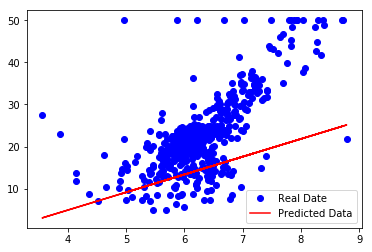

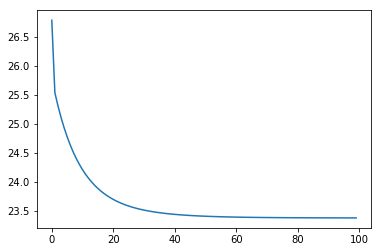

In [12]:
Y_pred = X_train * w_value + b_value
print("Done")
# plot the rewult
plt.plot(X_train,Y_train, "bo", label="Real Date")
plt.plot(X_train,Y_pred, 'r',label="Predicted Data") # 预测数据图
plt.legend()
plt.show()
plt.plot(total) # 显示 loss 图
plt.show()

下图是简单线性回归器的 TensorBoard 图：
<img src="./Markdown_images/miao_14_TensorFlow_实现简单线性回归/01.png" width="800">
该图有两个名称范围节点 Variable 和 Variable_1，它们分别是表示偏置和权重的高级节点。以梯度命名的节点也是一个高级节点，展开节点，可以看到它需要 7 个输入并使用 GradientDescentOptimizer 计算梯度，对权重和偏置进行更新：
<img src="./Markdown_images/miao_14_TensorFlow_实现简单线性回归/02.gif" width="800">

## 总结
本节进行了简单的线性回归，但是如何定义模型的性能呢？

有多种方法可以做到这一点。统计上来说，可以计算 R2 或将数据分为训练集和交叉验证集，并检查验证集的准确性（损失项）。